<div style="
  background: linear-gradient(90deg, #222e42ff, #d8aee4ff);
  padding: 16px;
  border-radius: 8px;
  color: #ffffff;
  font-family: Arial, sans-serif;
">

  <h2 style="margin: 0 0 8px 0;">
    Pract – 3: Implementation of Federated Learning
  </h2>

  <p style="margin: 0; font-size: 14px; line-height: 1.5;">
    • Generate a synthetic dataset for Linear Regression<br/>
    • Create 3 clients and train local models<br/>
    • Client 1 data: 1, 2, 3, 4, …<br/>
    • Client 2 data: 2, 4, 6, 8, …<br/>
    • Client 3 data: 3, 6, 9, 12, …<br/>
    • Aggregate weights/gradients to form a global model<br/>
    • Send updated global model back to clients
  </p>

</div>


In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Generate Synthetic Data

In [8]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y_client1 = 1 * X
y_client2 = 2 * X
y_client3 = 3 * X

## Step 2: Define Linear Regression Model

In [9]:
def train_linear_regression(X, y, lr=0.01, epochs=100):
    w = np.random.randn()
    b = np.random.randn()
    for _ in range(epochs):
        y_pred = w * X.flatten() + b
        dw = -2 * np.mean(X.flatten() * (y.flatten() - y_pred))
        db = -2 * np.mean(y.flatten() - y_pred)
        w -= lr * dw
        b -= lr * db
    return w, b

## Step 3: Train Local Models

In [10]:
w1, b1 = train_linear_regression(X, y_client1)
w2, b2 = train_linear_regression(X, y_client2)
w3, b3 = train_linear_regression(X, y_client3)

print('Client 1:', w1, b1)
print('Client 2:', w2, b2)
print('Client 3:', w3, b3)

Client 1: 0.5856949308481684 1.4957727579081352
Client 2: 1.749516231172123 0.9043258835373275
Client 3: 3.0041780176190005 -0.01508396930230976


## Step 4: Federated Aggregation

In [11]:
w_global = (w1 + w2 + w3) / 3
b_global = (b1 + b2 + b3) / 3
print('Global Model:', w_global, b_global)

Global Model: 1.7797963932130976 0.7950048907143844


## Step 5: Visualization

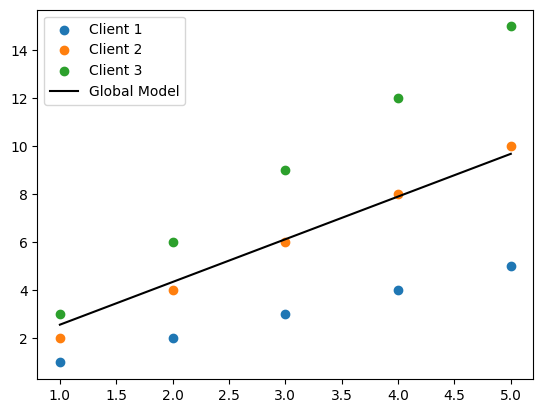

In [12]:
y_pred_global = w_global * X + b_global
plt.scatter(X, y_client1, label='Client 1')
plt.scatter(X, y_client2, label='Client 2')
plt.scatter(X, y_client3, label='Client 3')
plt.plot(X, y_pred_global, color='black', label='Global Model')
plt.legend()
plt.show()